In [7]:
import xlrd
import pylab as pylab
import numpy as np
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.interpolate
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
%matplotlib inline 

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
def getMatrixCanal(folder,archivo,paso,canal):
    workbook= xlrd.open_workbook(folder+archivo)
    sheet_names=workbook.sheet_names()
    #print sheet_names
    toma_sheet=workbook.sheet_by_name(sheet_names[0])
    promedio_sheet=workbook.sheet_by_name(sheet_names[1])
    suma_sheet=workbook.sheet_by_name(sheet_names[2])
    x_promedio=promedio_sheet.col_values(0)
    y_promedio=promedio_sheet.col_values(1)
    #canal= 6 a, 7 b, 8 ab
    canalB_promedio=promedio_sheet.col_values(canal)
    #CLeaning list
    del x_promedio[0]
    del y_promedio[0]
    del canalB_promedio[0]
    #arrays
    x=np.asarray(x_promedio)
    y=np.asarray(y_promedio)
    z=np.asarray(canalB_promedio)
    z_aux=z
    rows=[]
    aux=1
    rangofloat=(10/(paso*10))*4+1
    rango=int(rangofloat)
    print rango
    ind2remove=np.linspace(0,rango-1,rango)
    for i in range(rango):
        if aux==0:
            row=z_aux[0:rango]
            rows.append(row)
            z_aux=np.delete(z_aux,ind2remove)
            aux=1
        else:
            row=z_aux[0:rango]
            rowp=row[::-1]
            rows.append(rowp)
            z_aux=np.delete(z_aux,ind2remove)
            aux=0 
    rowsinverted=rows[::-1]
    matrix=np.matrix(rowsinverted)
    return matrix,rango 
def getAllMatrix(folder,archivo,paso):
    ma,r=getMatrixCanal(folder,archivo,paso,6)
    mb,r=getMatrixCanal(folder,archivo,paso,7)
    mab,r=getMatrixCanal(folder,archivo,paso,8)
    return ma,mb,mab,r,folder

In [9]:
def grafAll(ma,mb,mab,rango,titulo,folder):
    fig, (axa,axb,axab) = plt.subplots(ncols=3)
    fig.set_size_inches(21.5,5.5)
    ima=axa.imshow(ma, aspect='auto', interpolation='none', origin='lower')
    imb=axb.imshow(mb, aspect='auto', interpolation='none', origin='lower')
    imab=axab.imshow(mab, aspect='auto', interpolation='none', origin='lower')
    #print ax.get_xticks()
    if rango==41:
        ran=(rango-1)/4
        x=np.linspace(0,rango-1,ran-1)
        labels=np.linspace(-2,2,ran-1)
    else:
        ran=(rango-1)/4
        x=np.linspace(0,rango-1,ran)
        labels=np.linspace(-2,2,ran)
    axa.set_xticks(x)
    axb.set_xticks(x)
    axab.set_xticks(x)
    axa.set_xticklabels(labels)
    axb.set_xticklabels(labels)
    axab.set_xticklabels(labels)
    axa.set_yticks(x)
    axb.set_yticks(x)
    axab.set_yticks(x)
    axa.set_yticklabels(labels)
    axb.set_yticklabels(labels)
    axab.set_yticklabels(labels)
    axa.set_xlabel('y')
    axb.set_xlabel('y')
    axab.set_xlabel('y')
    axa.set_ylabel('x')
    axb.set_ylabel('x')
    axab.set_ylabel('x')   
    axa.set_xlim(0,rango-1)
    axb.set_xlim(0,rango-1)
    axab.set_xlim(0,rango-1)
    axa.set_ylim(0,rango-1)
    axb.set_ylim(0,rango-1)
    axab.set_ylim(0,rango-1)
    axa.set_title('Canal A')
    axb.set_title('Canal B')
    axab.set_title('Canal AB')
    plt.colorbar(ima,ax=axa)
    plt.colorbar(imb,ax=axb)
    plt.colorbar(imab,ax=axab)
    fig.suptitle(titulo)
    fig.savefig(folder+titulo+'.png')
    plt.show()

In [10]:
def graficar1(matrix,rango,titulo,folder):
    fig, ax = plt.subplots()
    fig.set_size_inches(8.5,7)
    im=ax.imshow(matrix, aspect='auto', interpolation='none', origin='lower')
    #print ax.get_xticks()
    ran=(rango-1)/4
    x=np.linspace(0,rango-1,ran-1)
    labels=np.linspace(-2,2,ran-1)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_xlim(0,rango-1)
    ax.set_ylim(0,rango-1)
    ax.set_title(titulo)
    plt.colorbar(im,ax=ax)
    fig.savefig(folder+titulo+'.png')
    plt.show()
def graficar2(matrix,rango,titulo,folder):
    fig, ax = plt.subplots()
    fig.set_size_inches(8.5,7)
    im=ax.imshow(m, aspect='auto', interpolation='none', origin='lower')
    #print ax.get_xticks()
    ran=(rango-1)/4
    x=np.linspace(0,rango-1,ran)
    labels=np.linspace(-2,2,ran)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_xlim(0,rango-1)
    ax.set_ylim(0,rango-1)
    ax.set_title(titulo)
    plt.colorbar(im,ax=ax)
    fig.savefig(folder+titulo+'.png')
    plt.show()




def graficar(m,ran,nom,f):
    if ran==41:
        graficar1(m,ran,nom,f)
    else:
        graficar2(m,ran,nom,f)

21
21
21


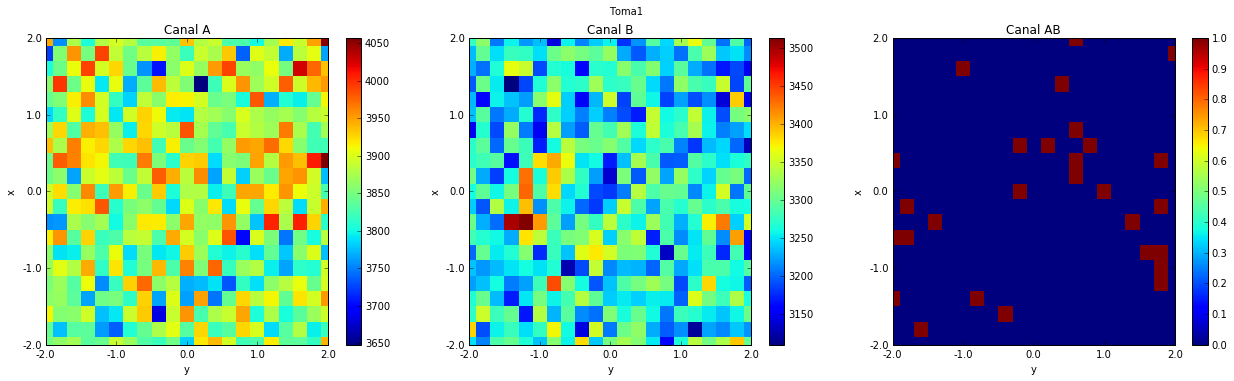

21
21
21


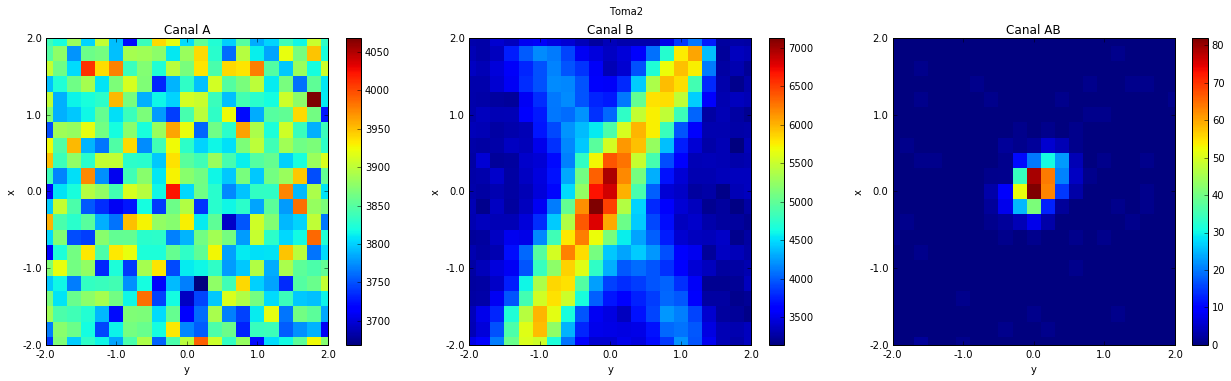

21
21
21


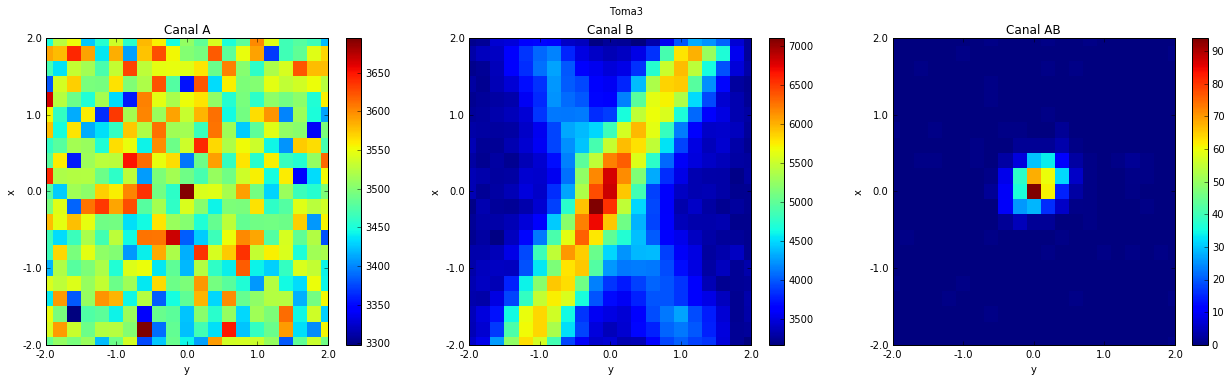

21
21
21


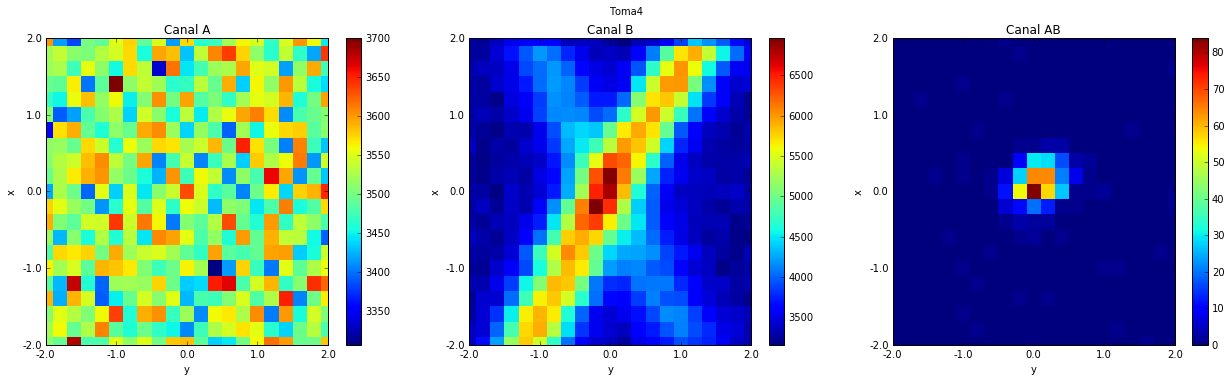

21
21
21


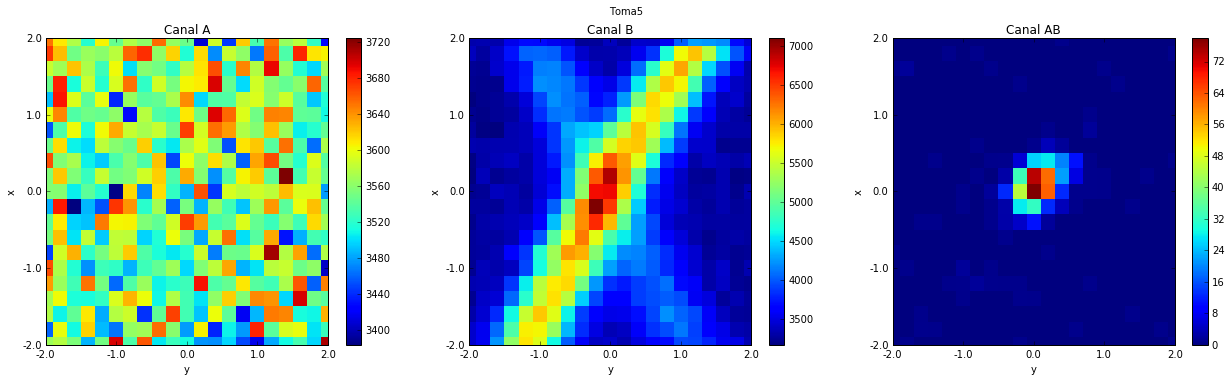

21
21
21


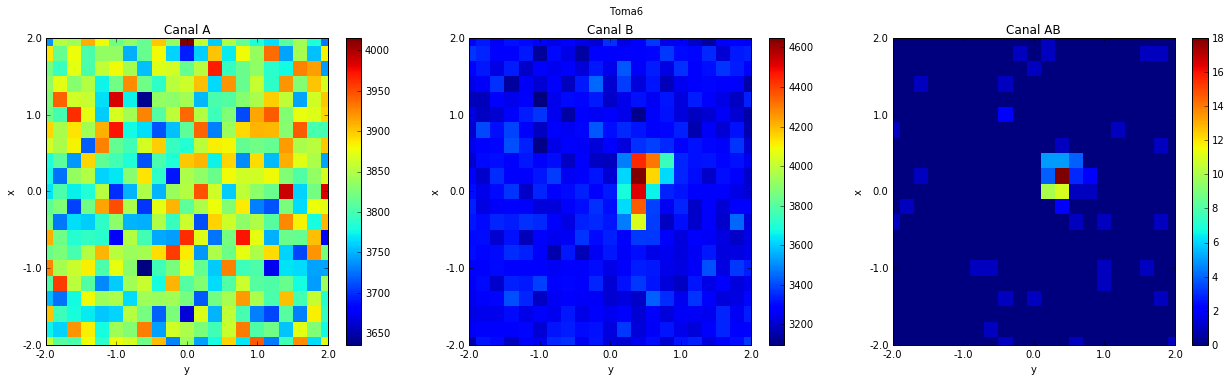

21
21
21


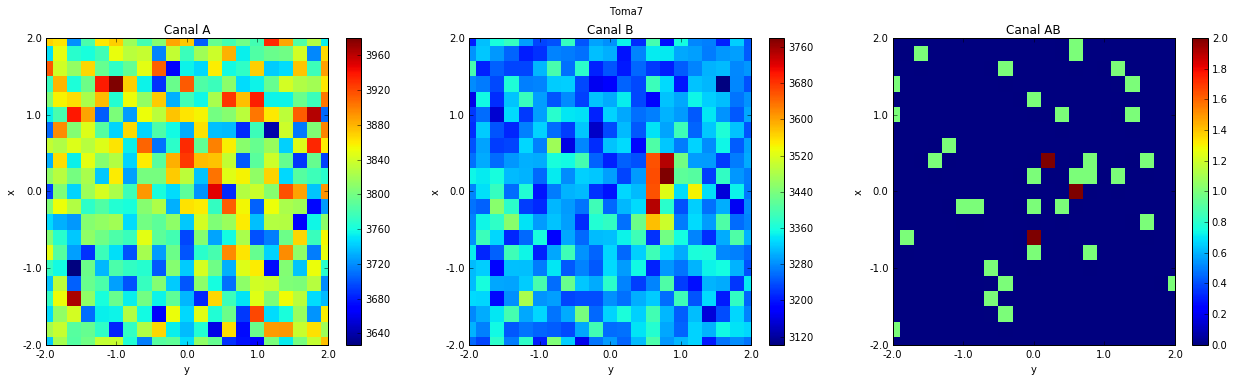

21
21
21


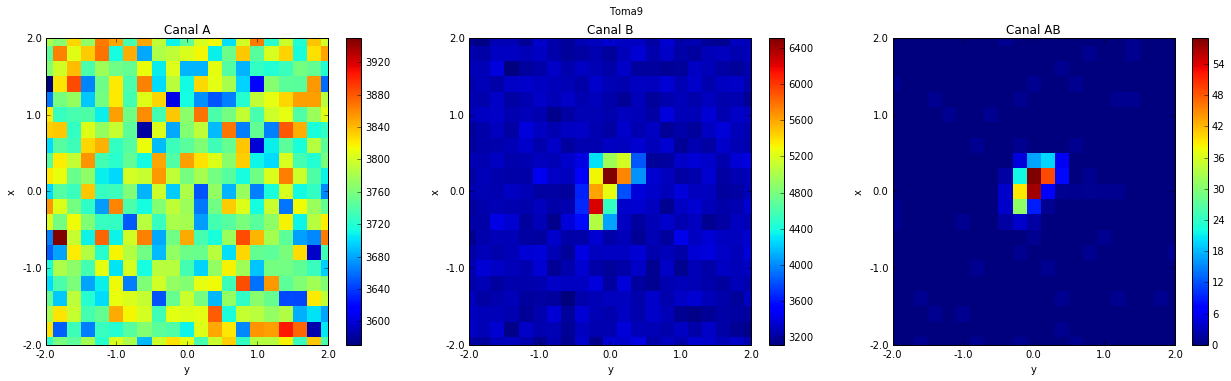

In [28]:
ma,mb,mab,rango,folder=getAllMatrix('Data/feb22/','Ubicacion1_reducido.xlsx',0.2)
grafAll(ma,mb,mab,rango,'Toma1',folder)
ma,mb,mab,rango,folder=getAllMatrix('Data/feb22/','Ubicacion2_reducido.xlsx',0.2)
grafAll(ma,mb,mab,rango,'Toma2',folder)
ma,mb,mab,rango,folder=getAllMatrix('Data/feb22/','Ubicacion3_reducido.xlsx',0.2)
grafAll(ma,mb,mab,rango,'Toma3',folder)
ma,mb,mab,rango,folder=getAllMatrix('Data/feb22/','Ubicacion4_reducido.xlsx',0.2)
grafAll(ma,mb,mab,rango,'Toma4',folder)
ma,mb,mab,rango,folder=getAllMatrix('Data/feb22/','Ubicacion5_reducido.xlsx',0.2)
grafAll(ma,mb,mab,rango,'Toma5',folder)
ma,mb,mab,rango,folder=getAllMatrix('Data/feb22/','Ubicacion6_reducido.xlsx',0.2)
grafAll(ma,mb,mab,rango,'Toma6',folder)
ma,mb,mab,rango,folder=getAllMatrix('Data/feb22/','Ubicacion7_reducido.xlsx',0.2)
grafAll(ma,mb,mab,rango,'Toma7',folder)
#ma,mb,mab,rango,folder=getAllMatrix('Data/feb22/','Ubicacion8_reducido.xlsx',0.2)
#grafAll(ma,mb,mab,rango,'Toma8',folder)
ma,mb,mab,rango,folder=getAllMatrix('Data/feb22/','Ubicacion9_reducido.xlsx',0.2)
grafAll(ma,mb,mab,rango,'Toma9',folder)

41
41
41


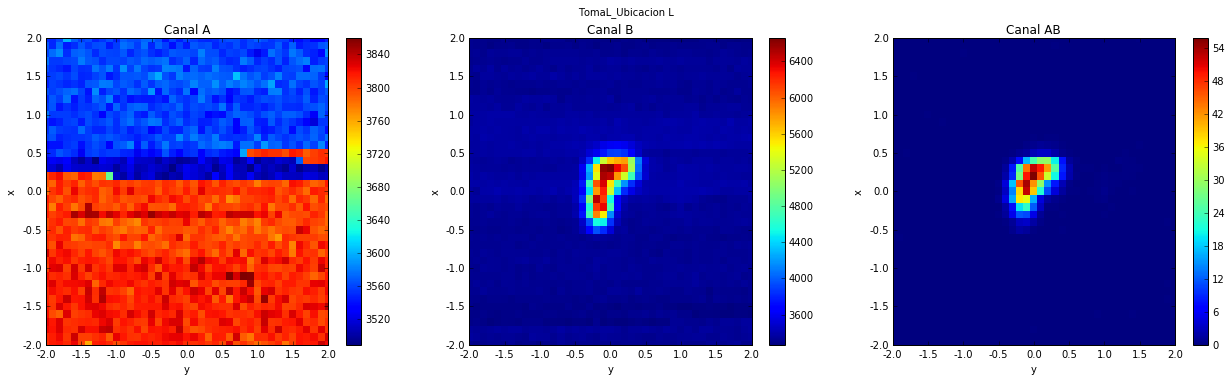

21
21
21


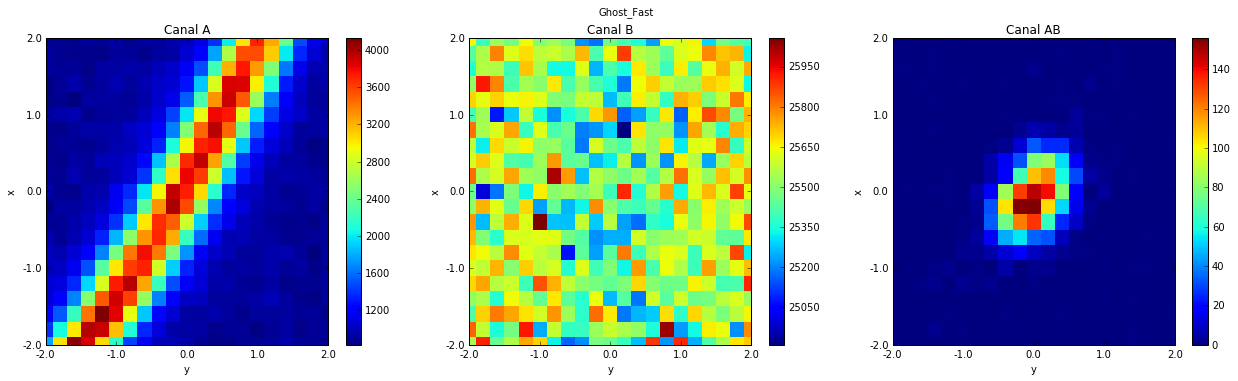

21
21
21


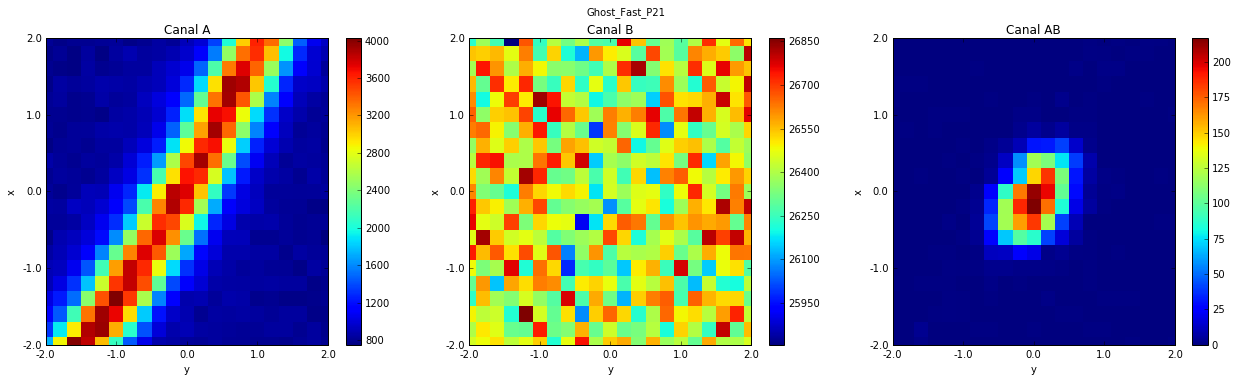

In [33]:
ma,mb,mab,rango,folder=getAllMatrix('Data/feb22/','UbicacionL_reducido.xlsx',0.1)
grafAll(ma,mb,mab,rango,'TomaL_Ubicacion L',folder)
ma,mb,mab,rango,folder=getAllMatrix('Data/ghostL/','GhostL1_reducido.xlsx',0.2)
grafAll(ma,mb,mab,rango,'Ghost_Fast',folder)
ma,mb,mab,rango,folder=getAllMatrix('Data/ghostL/','GhostL_P2_reducido.xlsx',0.2)
grafAll(ma,mb,mab,rango,'Ghost_Fast_P21',folder)

41
41
41


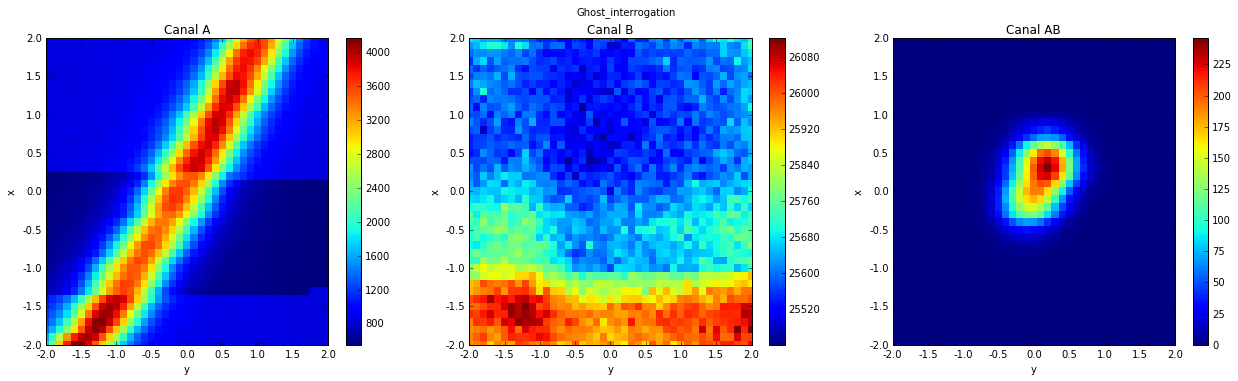

In [32]:

ma,mb,mab,rango,folder=getAllMatrix('Data/mask1/','ghostinterrogacion_reducido.xlsx',0.1)
grafAll(ma,mb,mab,rango,'Ghost_interrogation',folder)